# <center>TITANIC SURVIVOR PREDICTION</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## loading titanic dataset

In [4]:
train_df = pd.read_csv(
    "https://gitlab.com/Peskyji/datasciencework/-/raw/master/titanic/train.csv"
    )

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## visualizing dataset

<AxesSubplot:>

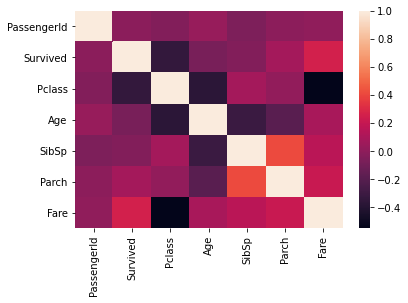

In [11]:
sns.heatmap(train_df.corr())

In [12]:
sns.set(rc={'figure.figsize':(11,7)})

In [15]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

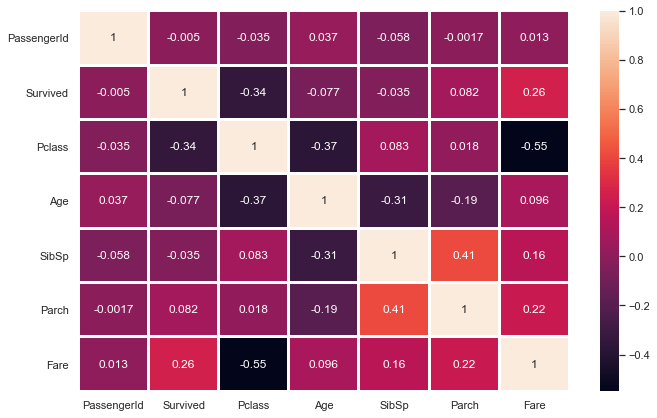

In [13]:
sns.heatmap(train_df.corr(), linewidths=2, annot=True)

In [17]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\shabisht\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

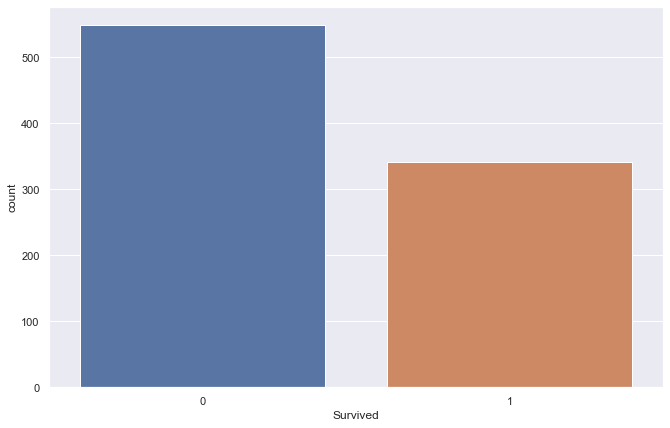

In [18]:
sns.countplot(train_df.Survived)

In [21]:
train_df.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

C:\Users\shabisht\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

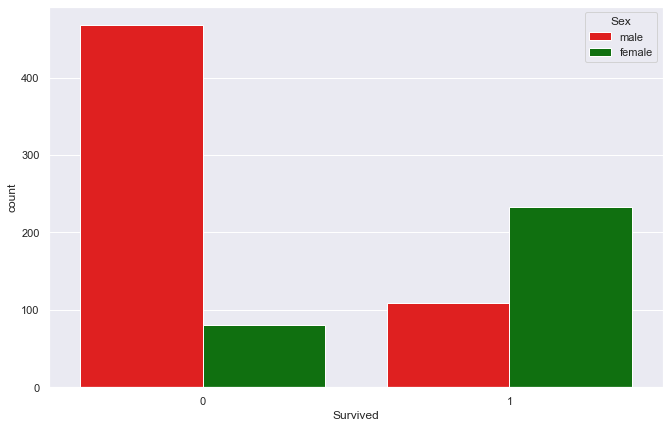

In [22]:
sns.countplot(train_df.Survived, hue=train_df.Sex, palette=['red','green'])

In [23]:
train_df[['Sex', 'Survived']].groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\shabisht\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

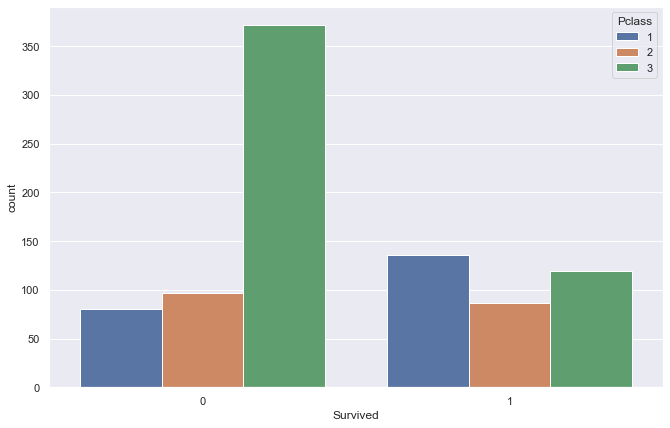

In [27]:
sns.countplot(train_df.Survived, hue=train_df.Pclass)

In [28]:
train_df[['Survived', 'Pclass']].groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

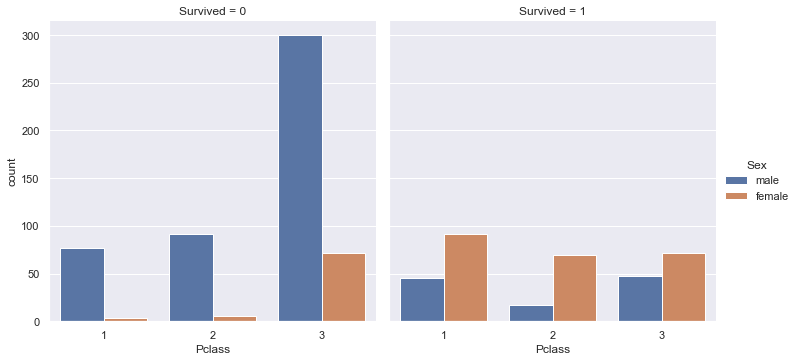

In [30]:
sns.catplot(x='Pclass', col='Survived', hue='Sex', data=train_df, kind='count')

In [31]:
train_df[['Survived', 'Sex', 'Pclass']].groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

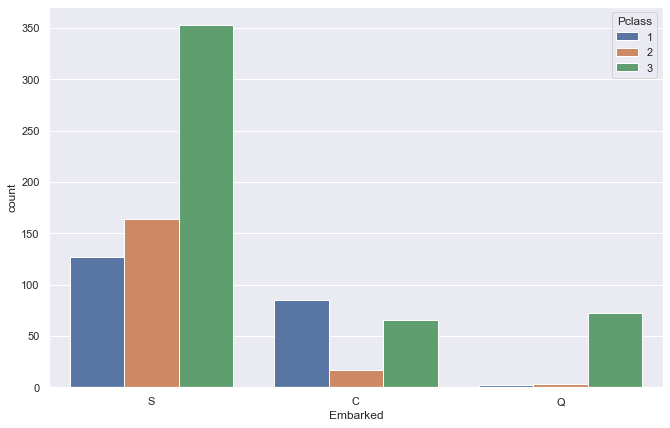

In [32]:
sns.countplot(hue='Pclass', x='Embarked', data = train_df)

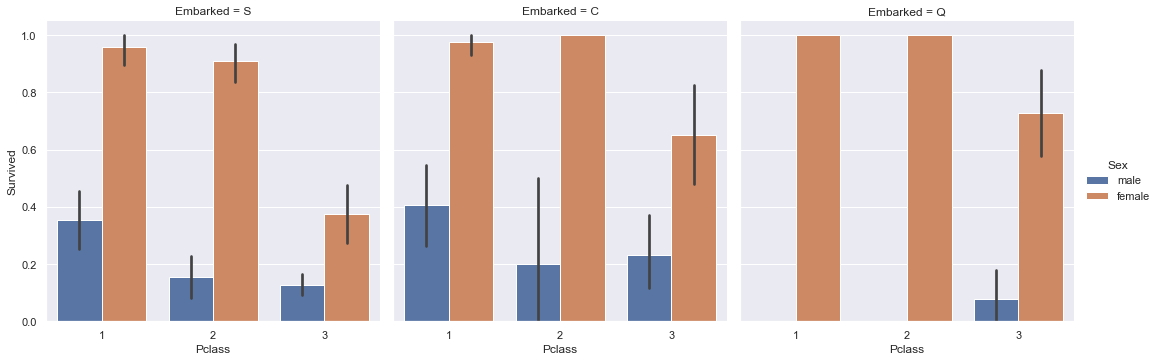

In [33]:
sns.catplot(data=train_df, x='Pclass', y='Survived', col='Embarked', hue='Sex', kind='bar')

## filling empty value for embarked column

In [37]:
filter1 = train_df.Embarked.isna()
train_df[filter1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [38]:
train_df.loc[61,'Embarked'] = 'Q'
train_df.loc[829,'Embarked'] = 'Q'

<AxesSubplot:xlabel='Age', ylabel='Count'>

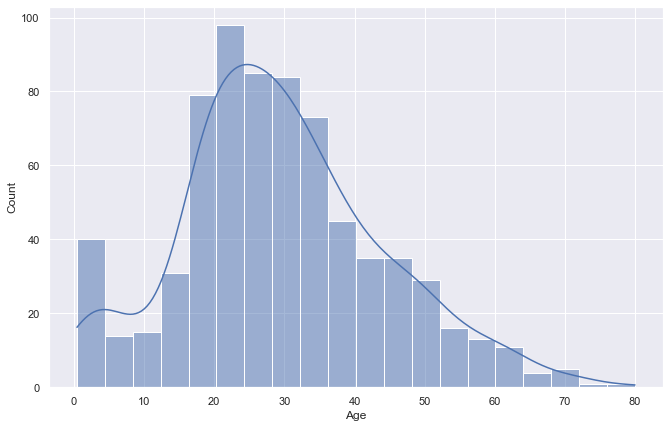

In [39]:
sns.histplot(train_df.Age, kde=True)

In [40]:
train_df[['Survived','Embarked','Pclass','Sex','Age']].groupby(['Embarked','Pclass','Sex','Survived']).Age.mean()

Embarked  Pclass  Sex     Survived
C         1       female  0           50.000000
                          1           35.675676
                  male    0           43.050000
                          1           36.437500
          2       female  1           19.142857
                  male    0           29.500000
                          1            1.000000
          3       female  0           20.700000
                          1           11.045455
                  male    0           27.555556
                          1           18.488571
Q         1       female  1           44.333333
                  male    0           44.000000
          2       female  1           30.000000
                  male    0           57.000000
          3       female  0           28.100000
                          1           17.600000
                  male    0           28.076923
                          1           29.000000
S         1       female  0           13.500000
     

## filling empty values in age column

In [41]:
def fill_age(x):
    survived, sex, age, pclass, embarked = x
    if pd.isnull(age):
        if embarked == 'C':
            if pclass == 1:
                if sex == 'female':
                    if survived == 0:
                        return 50
                    else:
                        return 35
                else:
                    if survived == 0:
                        return 43.05
                    else:
                        return 36.43
                    
            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 19.14
                else:
                    if survived == 0:
                        return 29.50
                    else:
                        return 1
                    
            else:
                if sex == 'female':
                    if survived == 0:
                        return 20.70
                    else:
                        return 11.07
                else:
                    if survived == 0:
                        return 27.55
                    else:
                        return 18.48
                    
        if embarked == 'Q':

            if pclass == 1:
                if sex == 'female':
                    if survived == 1:
                        return 44.33
                else:
                    if survived == 0:
                        return 44

            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 30
                else:
                    if survived == 0:
                        return 57

            else:
                if sex == 'female':
                    if survived == 0:
                        return 28.10
                    else:
                        return 17.60
                else:
                    if survived == 0:
                        return 28.07
                    else:
                        return 29

        if embarked == 'S':

            if pclass == 1:
                if sex == 'female':
                    if survived == 0:
                        return 13.5
                    else:
                        return 33.61
                else:
                    if survived == 0:
                        return 45.36
                    else:
                        return 36.12

            elif pclass == 2:
                if sex == 'female':
                    if survived == 1:
                        return 36
                    else:
                        return 29.09
                else:
                    if survived == 0:
                        return 33.41
                    else:
                        return 17.09

            else:
                if sex == 'female':
                    if survived == 0:
                        return 23.68
                    else:
                        return 22.54
                else:
                    if survived == 0:
                        return 27.16
                    else:
                        return 22.93
    return age
                

train_df.Age = train_df[['Survived','Sex','Age','Pclass','Embarked']].apply(fill_age, axis=1)        

## removing unwanted features from training data

In [43]:
train_df.drop(columns=['Cabin', 'Name','Ticket','Fare', 'PassengerId'], inplace=True)

In [44]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [45]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


## changing categorical features into numerical values

In [46]:
Sex = pd.get_dummies(train_df.Sex, drop_first=True)

In [50]:
Embarked = pd.get_dummies(train_df.Embarked, drop_first=True)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [48]:
train_df.drop(columns=['Embarked','Sex'], inplace=True)

In [49]:
train_df = pd.concat([train_df,Sex,Embarked], axis=1)

In [52]:
train_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0


In [53]:
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]
y = train_df[['Survived']]

In [54]:
X.head(2)

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0


## scaling independent features

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
X = StandardScaler().fit_transform(X)
# X = StandardScaler().fit_transform(X[['Age','Pclass']])
# X = MinMaxScaler().fit_transform(train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']])

In [57]:
X

array([[ 0.82737724, -0.54198211,  0.43279337, ...,  0.73769513,
        -0.31191448,  0.61930636],
       [-1.56610693,  0.64718906,  0.43279337, ..., -1.35557354,
        -0.31191448, -1.61470971],
       [ 0.82737724, -0.24468932, -0.4745452 , ..., -1.35557354,
        -0.31191448,  0.61930636],
       ...,
       [ 0.82737724, -0.41711914,  0.43279337, ..., -1.35557354,
        -0.31191448,  0.61930636],
       [-1.56610693, -0.24468932, -0.4745452 , ...,  0.73769513,
        -0.31191448, -1.61470971],
       [ 0.82737724,  0.20124987, -0.4745452 , ...,  0.73769513,
         3.20600702, -1.61470971]])

In [ ]:
# X = pd.concat([train_df.drop(columns=['Age','Pclass']), pd.DataFrame(X, columns=['Age','Pclass'])], axis=1)
# X.head(2)

## splitting dataset into training and cross validation dataset

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 89)

## Model training with Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\shabisht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [62]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [64]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[102,  11],
       [ 16,  50]], dtype=int64)

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       113
           1       0.82      0.76      0.79        66

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



## Support Vector Machine

In [66]:
from sklearn.svm import SVC

In [67]:
model2 = SVC().fit(X_train, y_train)

C:\Users\shabisht\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
pred = model2.predict(X_test)

In [69]:
confusion_matrix(y_test, pred)

array([[111,   2],
       [ 21,  45]], dtype=int64)

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       113
           1       0.96      0.68      0.80        66

    accuracy                           0.87       179
   macro avg       0.90      0.83      0.85       179
weighted avg       0.88      0.87      0.87       179



## KNN Classification

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
score=[]
for k in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    pred = knn_model.predict(X_test)
    score.append(accuracy_score(y_test, pred))    

<ipython-input-72-646e24eb5c1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
<ipython-input-72-646e24eb5c1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
<ipython-input-72-646e24eb5c1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
<ipython-input-72-646e24eb5c1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model = KNeigh

<AxesSubplot:>

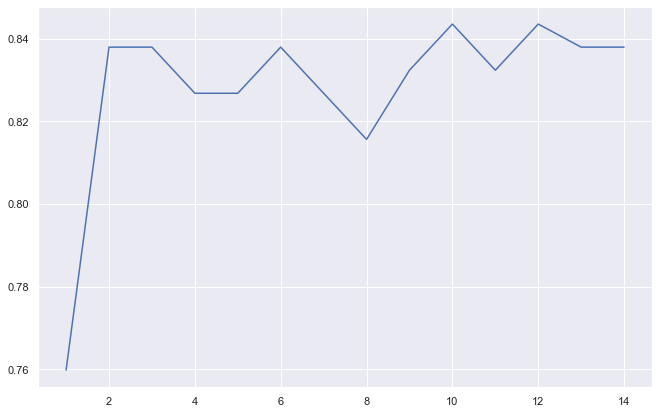

In [73]:
sns.lineplot(y=score, x=range(1,15))

In [74]:
model3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

<ipython-input-74-afb89c65639e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


In [75]:
pred = model3.predict(X_test)

In [76]:
confusion_matrix(y_test, pred)

array([[98, 15],
       [14, 52]], dtype=int64)

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       113
           1       0.78      0.79      0.78        66

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



## Decision Tree Classification

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model4 = DecisionTreeClassifier().fit(X_train, y_train)

In [80]:
pred = model4.predict(X_test)

In [81]:
confusion_matrix(y_test, pred)

array([[101,  12],
       [ 18,  48]], dtype=int64)

In [82]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       113
           1       0.80      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model5 = RandomForestClassifier(n_estimators=80, max_depth=5).fit(X_train, y_train)

pred = model5.predict(X_test)

confusion_matrix(y_test, pred)

<ipython-input-84-c43d24bef47b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5 = RandomForestClassifier(n_estimators=80, max_depth=5).fit(X_train, y_train)


array([[108,   5],
       [ 23,  43]], dtype=int64)

In [85]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       113
           1       0.90      0.65      0.75        66

    accuracy                           0.84       179
   macro avg       0.86      0.80      0.82       179
weighted avg       0.85      0.84      0.84       179



<br>

## Till now SVM has performed better. Using it for testing dataset.

<br><br>

## Loading Test dataset for predictions

In [86]:
test_df = pd.read_csv(
    "https://gitlab.com/Peskyji/datasciencework/-/raw/master/titanic/test.csv"
    )

In [87]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [88]:
test_df.shape

(418, 11)

In [89]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## dropping unwanted features

In [92]:
test_df.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin'], inplace=True)

KeyError: "['Name' 'Ticket' 'Fare' 'Cabin'] not found in axis"

## filling null values in age column

In [93]:
def fill_age_test(x):
    sex, age, pclass, embarked = x
    if pd.isnull(age):
        if embarked == 'C':
            if pclass == 1:
                if sex == 'female':
                    return 42
                else:
                    return 40
                    
            elif pclass == 2:
                if sex == 'female':
                    return 19.14
                else:
                    return 30
                    
            else:
                if sex == 'female':
                    return 15
                else:
                    return 23
                    
        if embarked == 'Q':

            if pclass == 1:
                return 44

            elif pclass == 2:
                return 46

            else:
                if sex == 'female':
                    return 23
                else:
                    return 29

        if embarked == 'S':

            if pclass == 1:
                if sex == 'female':
                    return 24
                else:
                    return 40

            elif pclass == 2:
                if sex == 'female':
                    return 32
                else:
                    return 22

            else:
                if sex == 'female':
                    return 23
                else:
                    return 24
    return age
        
test_df.Age = test_df[['Sex','Age','Pclass','Embarked']].apply(fill_age_test, axis=1)        

## changing Categorical features to numerical

In [94]:
Sex = pd.get_dummies(test_df.Sex, drop_first=True)
Embarked = pd.get_dummies(test_df.Embarked, drop_first=True)

In [95]:
test_df.drop(columns=['Embarked','Sex'], inplace=True)

In [96]:
test_df = pd.concat([test_df,Sex,Embarked], axis=1)

In [97]:
X1 = test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]

In [98]:
X1.head(2)

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1


## scaling features for test dataset

In [99]:
# X2 = StandardScaler().fit_transform(X1[['Pclass','Age']])
# X1 = pd.concat([X1.drop(columns=['Age','Pclass']), pd.DataFrame(X2, columns=['Age','Pclass'])], axis=1)
# X1.head(2)

X1 = StandardScaler().fit_transform(X1)

In [100]:
test_pred = model2.predict(X1)
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
answer = pd.concat([test_df.PassengerId, pd.DataFrame(test_pred, columns=['Survived'])], axis=1)
answer.shape

(418, 2)

In [ ]:
# answer.to_csv("Titanic Submission4.csv",index = False)

# The 👆 solution got 77.990 % accuracy on kaggle.

## miscellenous

In [ ]:
train_df.drop(columns=['SibSp', 'Parch'], inplace=True)
train_df.head(1)

In [ ]:
train_df

In [ ]:
X2 = StandardScaler().fit_transform(train_df.drop(columns=['Survived']))

In [ ]:
X2.shape

In [ ]:
xtrn, xtest, ytrn, ytest = train_test_split(X2,y,test_size=0.2,random_state=0)

In [ ]:
modell = LogisticRegression().fit(xtrn,ytrn)

In [ ]:
confusion_matrix(ytest, modell.predict(xtest))

In [ ]:
print(classification_report(ytest,modell.predict(xtest)))

In [ ]:
modell2 = SVC().fit(xtrn,ytrn)

In [ ]:
confusion_matrix(ytest,modell2.predict(xtest))

In [ ]:
print(classification_report(ytest, modell2.predict(xtest)))

In [ ]:
modell3 = DecisionTreeClassifier().fit(xtrn,ytrn)

In [ ]:
confusion_matrix(ytest, modell3.predict(xtest))